In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rr_data = pd.read_csv('../Data/rr_default_5000_iters_shakespeare_wc.csv')
default_data = pd.read_csv('../Data/faasm_default_5000_iters_shakespeare_wc.csv')

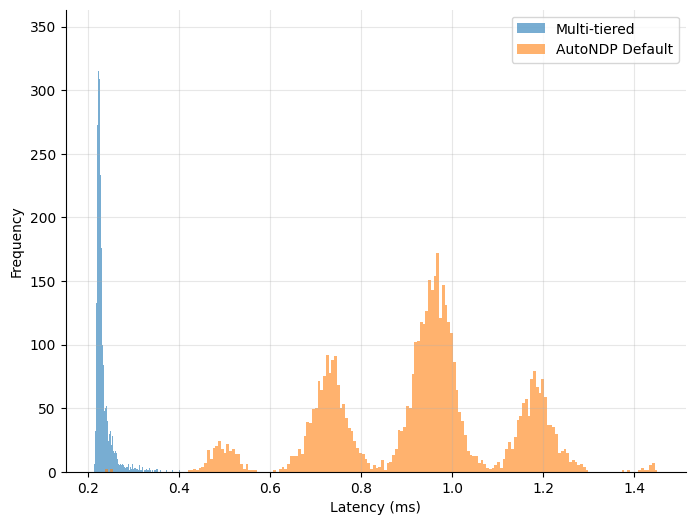

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rr_data['Latency'], bins=200, alpha=0.6, label='Multi-tiered')
ax.hist(default_data['Latency'], bins=200, alpha=0.6,label='AutoNDP Default')
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('Frequency')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.3)



plt.legend()
plt.show()

In [4]:
# standard deviation
print('Standard deviation of multi-tiered balancer:', np.std(rr_data['Latency']))
print('Standard deviation of Faasm default invoker:', np.std(default_data['Latency']))

Standard deviation of multi-tiered balancer: 0.018964704961866648
Standard deviation of Faasm default invoker: 0.18835024987334997


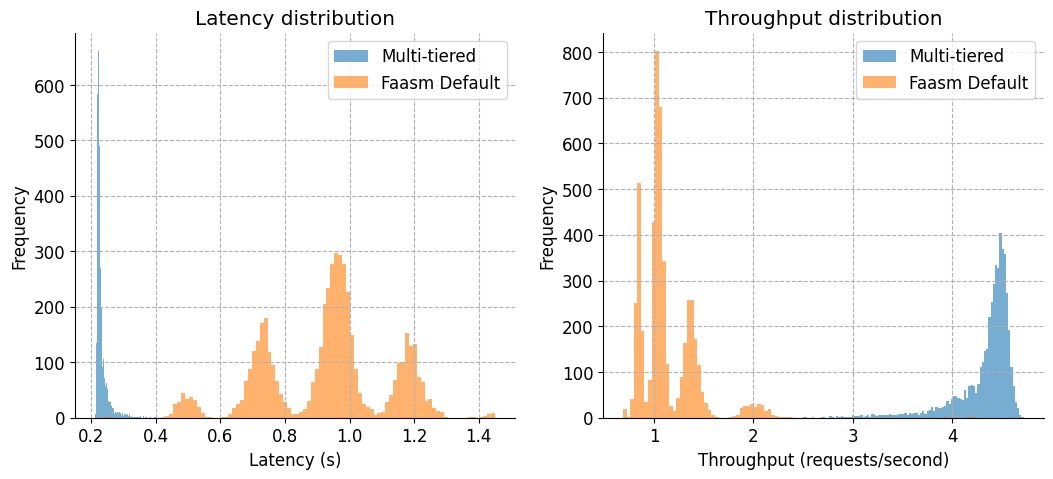

Mode of latency for Multi-tiered balancer (Round Robin): 0    0.222498
Name: Latency, dtype: float64
Mode of latency for Faasm default invoker: 0     0.692394
1     0.708934
2     0.721569
3     0.734509
4     0.740211
5     0.744854
6     0.750468
7     0.909251
8     0.912465
9     0.932343
10    0.944939
11    0.948844
12    0.954095
13    0.956125
14    0.957093
15    0.962246
16    0.962454
17    0.965301
18    0.967822
19    0.969954
20    0.970227
21    0.972433
22    0.974017
23    0.978618
24    0.980675
25    0.980780
26    0.998984
27    1.010924
28    1.013689
29    1.024077
30    1.028059
31    1.186923
32    1.197510
33    1.212365
Name: Latency, dtype: float64


In [17]:
# Plot distribution of latency and throughput for each function on 2 graphs in 1 figure
fig, ax = plt.subplots(1, 2, figsize=(12.5, 5))
plt.rcParams.update({'font.size': 12})

# Latency
ax[0].hist(rr_data['Latency'], bins=100, alpha=0.6,label='Multi-tiered')
ax[0].hist(default_data['Latency'], bins=100, alpha=0.6,label='Faasm Default')
ax[0].set_xlabel('Latency (s)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Latency distribution')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend()
ax[0].grid(True, linestyle='--')

# Throughput
ax[1].hist(rr_data['Throughput'], bins=100, alpha=0.6, label='Multi-tiered')
ax[1].hist(default_data['Throughput'], bins=100, alpha=0.6, label='Faasm Default')
ax[1].set_xlabel('Throughput (requests/second)')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Throughput distribution')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend()
ax[1].grid(True, linestyle='--')

plt.show()

# print modes from each distribution
print('Mode of latency for Multi-tiered balancer (Round Robin):', rr_data['Latency'].mode())
print('Mode of latency for Faasm default invoker:', default_data['Latency'].mode())

In [6]:
# Calculate variability of latency and throughput for each function
print('Coefficient of variation of latency for Multi-tiered balancer (Round Robin):', np.std(rr_data['Latency']) / np.mean(rr_data['Latency']))
print('Coefficient of variation of throughput for Multi-tiered balancer (Round Robin):', np.std(rr_data['Throughput']) / np.mean(rr_data['Throughput']))

print()

print('Coefficient of variation of latency for Faasm default invoker:', np.std(default_data['Latency']) / np.mean(default_data['Latency']))
print('Coefficient of variation of throughput for Faasm default invoker:', np.std(default_data['Throughput']) / np.mean(default_data['Throughput']))

print()

# Calculate 95th percentile of latency for each function
print('95th percentile of latency for Multi-tiered balancer (Round Robin):', np.percentile(rr_data['Latency'], 95))
print('95th percentile of latency for Faasm default invoker:', np.percentile(default_data['Latency'], 95))

print()
# Calculate 95th percentile of throughput for each function
print('95th percentile of throughput for Multi-tiered balancer (Round Robin):', np.percentile(rr_data['Throughput'], 95))
print('95th percentile of throughput for Faasm default invoker:', np.percentile(default_data['Throughput'], 95))


Coefficient of variation of latency for Multi-tiered balancer (Round Robin): 0.08182549981439559
Coefficient of variation of throughput for Multi-tiered balancer (Round Robin): 0.0666563983410405

Coefficient of variation of latency for Faasm default invoker: 0.20301398339098833
Coefficient of variation of throughput for Faasm default invoker: 0.2561311316416018

95th percentile of latency for Multi-tiered balancer (Round Robin): 0.26667760000000007
95th percentile of latency for Faasm default invoker: 1.21018595

95th percentile of throughput for Multi-tiered balancer (Round Robin): 4.586548981976437
95th percentile of throughput for Faasm default invoker: 1.5987236658379664


In [7]:
# Calculate mean and standard deviation of latency and throughput for each function
rr_mean_latency = round(np.mean(rr_data['Latency']), 3)
rr_median_latency = round(np.median(rr_data['Latency']), 3)
rr_std_latency = round(np.std(rr_data['Latency']), 3)
rr_mean_throughput = round(np.mean(rr_data['Throughput']), 3)
rr_std_throughput = round(np.std(rr_data['Throughput']), 3)

default_mean_latency = round(np.mean(default_data['Latency']), 3)
default_median_latency = round(np.median(default_data['Latency']), 3)
default_std_latency = round(np.std(default_data['Latency']), 3)
default_mean_throughput = round(np.mean(default_data['Throughput']), 3)
default_std_throughput = round(np.std(default_data['Throughput']), 3)

print('Round Robin mean latency: ', rr_mean_latency)
print('Round Robin median latency: ', rr_median_latency)
print('Round Robin std latency: ', rr_std_latency)
print('Round Robin mean throughput: ', rr_mean_throughput)
print('Round Robin std throughput: ', rr_std_throughput)

print()
print()

print('Default mean latency: ', default_mean_latency)
print('Default median latency: ', default_median_latency)
print('Default std latency: ', default_std_latency)
print('Default mean throughput: ', default_mean_throughput)
print('Default std throughput: ', default_std_throughput)

print("Multi-tiered min latency: ", np.min(rr_data['Latency']))
print("Multi-tiered max latency: ", np.max(rr_data['Latency']))

print("Default min latency: ", np.min(default_data['Latency']))
print("Default max latency: ", np.max(default_data['Latency']))

Round Robin mean latency:  0.232
Round Robin median latency:  0.226
Round Robin std latency:  0.019
Round Robin mean throughput:  4.338
Round Robin std throughput:  0.289


Default mean latency:  0.928
Default median latency:  0.952
Default std latency:  0.188
Default mean throughput:  1.133
Default std throughput:  0.29
Multi-tiered min latency:  0.211816
Multi-tiered max latency:  0.400187
Default min latency:  0.235836
Default max latency:  1.450924


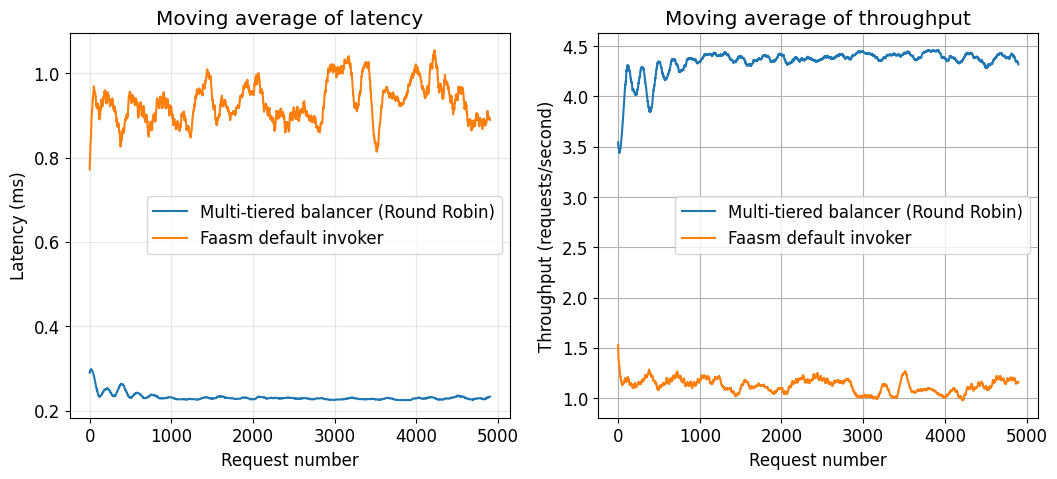

In [8]:
# Plot latency

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

fig, ax = plt.subplots(1, 2, figsize=(12.5, 5))
plt.rcParams.update({'font.size': 12})

# plot moving average of latency
ax[0].plot(moving_average(rr_data['Latency'], 100), label='Multi-tiered balancer (Round Robin)')
ax[0].plot(moving_average(default_data['Latency'], 100), label='Faasm default invoker')
ax[0].set_xlabel('Request number')
ax[0].set_ylabel('Latency (ms)')
ax[0].set_title('Moving average of latency')
ax[0].legend()
ax[0].grid(True, alpha=0.3)

# Plot moving average of throughput
ax[1].plot(moving_average(rr_data['Throughput'], 100), label='Multi-tiered balancer (Round Robin)')
ax[1].plot(moving_average(default_data['Throughput'], 100), label='Faasm default invoker')
ax[1].set_xlabel('Request number')
ax[1].set_ylabel('Throughput (requests/second)')
ax[1].set_title('Moving average of throughput')
ax[1].legend()
ax[1].grid(True)

plt.show()




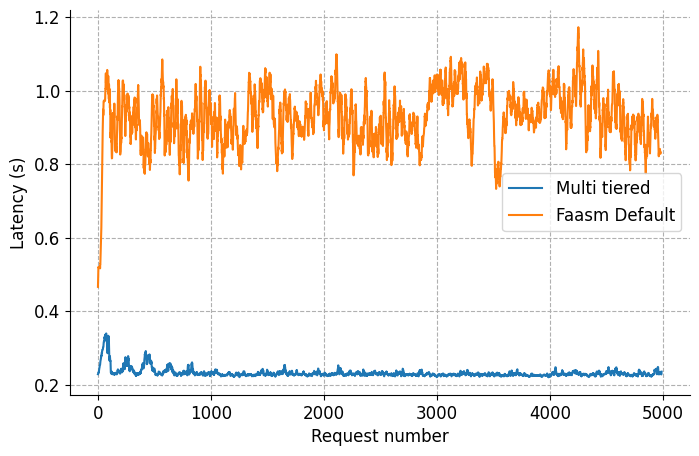

In [18]:
# plot moving average of latency
fig = plt.figure(figsize=(8, 5))
plt.plot(moving_average(rr_data['Latency'], 10), label='Multi tiered')
plt.plot(moving_average(default_data['Latency'], 20), label='Faasm Default')
plt.xlabel('Request number')
plt.ylabel('Latency (s)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().grid(True, linestyle='--')
plt.legend()
